# **4. Aprendizado de Máquina**

O objetivo desse notebook é **exclusivamente** aplicar algoritmos de aprendizado de máquina no trabalho prático.

Esse notebook é para a etapa 2 do trabalho com ênfase na interpretabilidade dos resultados dos algoritmos e no entendimento detalhado do comportamento final dos modelos.

In [3]:
# Importação das bibliotecas necessárias.
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

## **4.1. Leitura dos Dados**

In [4]:
# Leitura dos conjuntos de treino e teste de arquivos pickle.
with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('Y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

with open('X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

Todos os dados importados nesse step já foram pré-processados.

## **4.2. Árvore de Decisão**

O primeiro algoritmo a ser testado para o problema é uma árvore de decisão, para isso será utilizado primeiramente otimizadores de hiperparâmetros: GridSearch e RandomSearch.

### 4.2.1. GridSearch

In [5]:
# Parâmetros para os otimizadores Grid e Random.
params = {
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', 0.2, 0.4, 0.8, 1]
}

In [6]:
# Instanciação do GridSearch e o ajuste aos dados de treino.
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 50],
                         'max_features': ['sqrt', 'log2', 0.2, 0.4, 0.8, 1],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [7]:
# Melhores parâmetros.
melhores_parametros = grid_search.best_params_
print(melhores_parametros)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.4, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [8]:
# Acurácia do modelo com os melhores parâmetros.
acuracia = grid_search.best_score_
print(acuracia)

0.6224629068362353


Os parâmetros encontrados pelo GridSearch retornam uma acurácia de 60%.

### 4.2.2. RandomSearch

In [9]:
# Instanciando Random Search com os parâmetros.
random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=params, n_iter=100, cv=10, scoring='accuracy', n_jobs=-1)

# Ajuste aos dados.
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 50],
                                        'max_features': ['sqrt', 'log2', 0.2,
                                                         0.4, 0.8, 1],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='accuracy')

In [10]:
# Melhores parâmetros.
melhores_parametros_random = random_search.best_params_
print(melhores_parametros_random)

{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 0.4, 'max_depth': 10, 'criterion': 'gini'}


In [11]:
# Acurácia do modelo com os melhores parâmetros.
acuracia_random = random_search.best_score_
print(acuracia_random)

0.6166961827222124


### 4.2.3. Instanciação do Modelo

In [12]:
# Instanciação da Árvore de Decisão.
arvore = DecisionTreeClassifier(criterion= melhores_parametros_random['criterion'],
                                        max_depth=melhores_parametros_random['max_depth'],
                                        max_features=melhores_parametros_random['max_features'],
                                        min_samples_leaf=melhores_parametros_random['min_samples_leaf'],
                                        min_samples_split=melhores_parametros_random['min_samples_split'],
                                        random_state=42
)

In [13]:
arvore.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=0.4, min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

In [14]:
resultados = cross_val_predict(arvore, X_test, y_test, cv=10)

In [15]:
print(metrics.classification_report(y_test, resultados))

              precision    recall  f1-score   support

           0       0.63      0.60      0.62      3821
           1       0.35      0.15      0.21       592
           2       0.82      0.87      0.84      7498

    accuracy                           0.75     11911
   macro avg       0.60      0.54      0.56     11911
weighted avg       0.73      0.75      0.74     11911



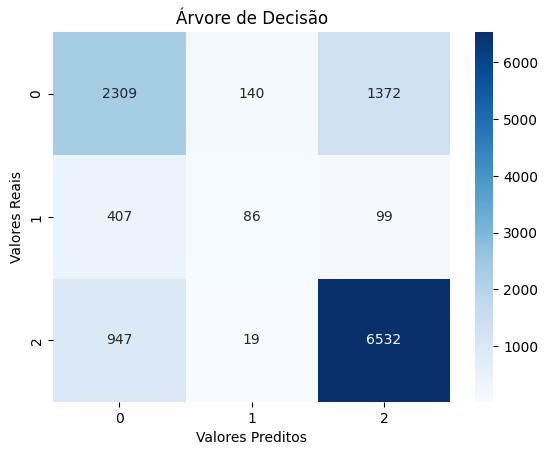

In [16]:
cm = metrics.confusion_matrix(y_test, resultados)

classes = [0,1,2]

# Plotagem da matriz de calor.
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes, cmap='Blues', fmt='g')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.title('Árvore de Decisão')
plt.show()

**Interpretação dos Resultados**

O modelo da Árvore de Decisão possui os seguintes hiperparâmetros:

- *Min_samples_split:* 10
- *Min_samples_leaf:* 4
- *Max_features:* 0.4
- *Max_depth:* 10
- *Criterion:* entropy

No geral, o modelo tem uma acurácia de 74%, isso significa que para o total de instâncias o modelo acerta a predição de 74% delas. Entretanto, a acurácia pode omitir informações de classes minoritárias.

Em relação à classe 1, que representa as pessoas com problemas de hipertensão e problemas cardiovasculares temos:

- 26% de Precision, isso indica que o modelo não prediz bem as instâncias dessas pessoas e gera muitos falsos positivos (FP), principalmente FP em relação à classe 2 que são as pessoas hipertensas. Isso quer dizer que o modelo confunde muito as pessoas com duas comorbidades com as pessoas que possuem uma comorbidade apenas.

- 17% de Recall, o modelo tem uma performance muito baixa na detecção de pessoas que possuem as duas comorbidades, ele gera muitos falsos negativos: uma pessoa que tem as duas doenças recebe a resposta errada e, dentre essas respostas erradas, ela recebe a resposta de que possui apenas hipertensão. Ou seja, mais uma vez o modelo confunde bastante as pessoas com as duas comorbidades com as pessoas hipertensas.


Em relação à classe 2, que representa as pessoas apenas com hipertensão temos:

- 81% de Precision, o modelo é bom em acertar as predições das pessoas apenas com hipertensão, em 80% das vezes ele acerta o resultado, os falsos positivos gerados estão distríbuidos de forma bem similar entre a classe das pessoas com duas comorbidades e as pessoas sem diagnóstico das doenças. Isso cria um possível cenário onde essas pessoas sem diagnóstico podem ter a doença e não saber que elas possuem e que as pessoas classificadas como falsos positivos nas duas comorbidades podem possuir as duas doenças mas não receberam o diagnóstico ainda.

- 89% de Recall, o modelo é muito bom em detectar as pessoas que possuem apenas hipertensão, ou seja, para o contexto de saúde isso é excelente porque o número de falsos negativos em relação à uma doença precisam ser minimizados o máximo possível.


Em relação à classe 3, que representa as pessoas sem diagnóstico ou "saudáveis" temos:

- 46% de Precision, o modelo é ruim em acertar as predições das pessoas que não possuem o diagnóstico das doenças, mais de 90% dos FP's são na classe dos hipertensos, o que mostra que o modelo têm uma tendência a achar que essas pessoas possuem um perfil similar aos hipertensos.

- 29% de Recall, o modelo é ruim em detectar pessoas sem diagnóstico. Isso é visível quando a maioria dos Falsos Negativos estão concentrados na classe 2, oque mais uma vez indica que o modelo acredita que essas pessoas possuem apenas hipertensão.


**Conclusão**

No geral, o modelo tem uma tendência à aprender mais sobre as pessoas apenas com hipertensão, isso deve ser provavelmente pelo desbalanceamento das classes, já que as pessoas hipertensas são quase 10x mais presentes que as outras.

Ademais, o modelo confunde muito a classe das pessoas sem diagnóstico/saudáveis e a classe das pessoas hipertensas com problemas cardiovasculares como sendo pessoas apenas com hipertensão. Nesse caso há duas possíveis percepções: o modelo está tendencioso ou essas pessoas têm um perfil muito similar entre si, oque pode indicar que as pessoas sem diagnóstico possuem essas doenças ou podem vir a possuir mas ainda não receberam o diagnóstico. E por último, as pessoas com duas comorbidades são frequentemente confundidas com as pessoas hipertensas porque a hipertensão é o **principal fator de risco** para o desenvolvimento de doenças do coração.

## **4.3. Random Forest**

In [17]:
# Instanciação do modelo de Random Forest.
random_forest = RandomForestClassifier(criterion= melhores_parametros_random['criterion'],
                                        max_depth=melhores_parametros_random['max_depth'],
                                        max_features=melhores_parametros_random['max_features'],
                                        min_samples_leaf=melhores_parametros_random['min_samples_leaf'],
                                        min_samples_split=melhores_parametros_random['min_samples_split'],
                                        random_state=42,
                                        n_estimators=150,
                                        n_jobs=-1
)

In [18]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=0.4, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=150, n_jobs=-1,
                       random_state=42)

In [19]:
resultados = cross_val_predict(arvore, X_test, y_test, cv=10)

print(metrics.classification_report(y_test, resultados))

              precision    recall  f1-score   support

           0       0.63      0.60      0.62      3821
           1       0.35      0.15      0.21       592
           2       0.82      0.87      0.84      7498

    accuracy                           0.75     11911
   macro avg       0.60      0.54      0.56     11911
weighted avg       0.73      0.75      0.74     11911



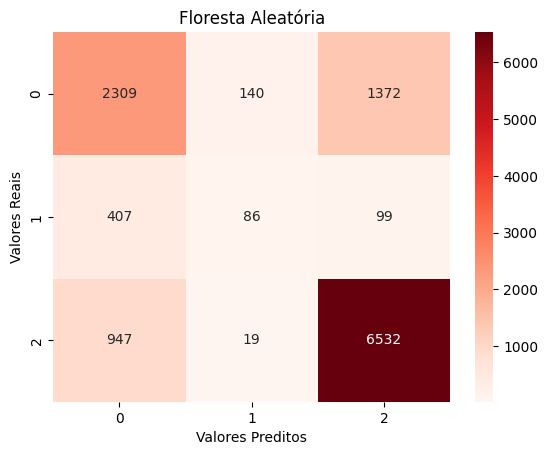

In [20]:
cm = metrics.confusion_matrix(y_test, resultados)

classes = [0,1,2]

# Plotagem da matriz de calor.
sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes, cmap='Reds', fmt='g')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.title('Floresta Aleatória')
plt.show()

## **4.4. Redes Neurais**

In [21]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 100, 100),
    activation='relu',
    alpha=0.0001,
    learning_rate='adaptive',
    solver='adam',
    random_state=42,
    max_iter=300
)

In [22]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), learning_rate='adaptive',
              max_iter=300, random_state=42)

In [23]:
resultados = cross_val_predict(mlp, X_test, y_test, cv=10)

In [24]:
print(metrics.classification_report(y_test, resultados))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56      3821
           1       0.25      0.23      0.24       592
           2       0.80      0.81      0.81      7498

    accuracy                           0.70     11911
   macro avg       0.54      0.53      0.54     11911
weighted avg       0.70      0.70      0.70     11911



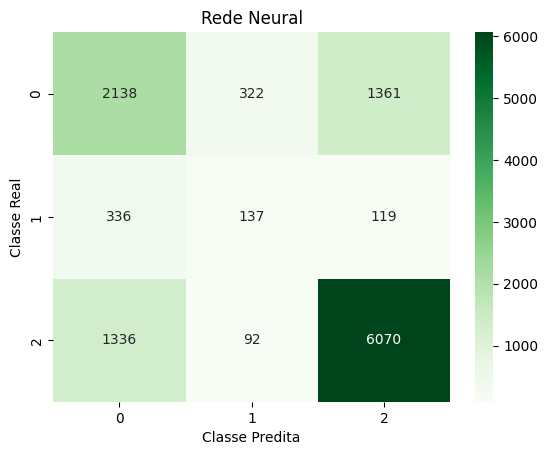

In [25]:
cm = metrics.confusion_matrix(y_test, resultados)

sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes, fmt='d', cmap='Greens')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Rede Neural')
plt.show()

As Redes Neurais tiveram o pior resultado dentro dos algoritmos testados, ela confunde as outras duas classes com a classe de hipertensão.